In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

def animar_e_salvar_mp4(caminho_arquivo_entrada):
    """
    Lê os dados da simulação Fortran, gera uma animação e salva como MP4
    na mesma pasta do arquivo de entrada.
    """
    
    # --- 1. Gerenciamento de Caminhos e Arquivos ---
    # Obtém o caminho absoluto para evitar erros
    caminho_absoluto = os.path.abspath(caminho_arquivo_entrada)
    
    # Descobre a pasta onde o arquivo está
    pasta_do_arquivo = os.path.dirname(caminho_absoluto)
    
    # Cria o nome do arquivo de saída (mesmo nome, extensão .mp4)
    nome_base = os.path.splitext(os.path.basename(caminho_absoluto))[0]
    caminho_saida = os.path.join(pasta_do_arquivo, f"{nome_base}.mp4")
    
    print(f"Lendo dados de: {caminho_absoluto}")
    
    # --- 2. Carregamento dos Dados ---
    try:
        # O código Fortran usa vírgula como separador 
        data = np.loadtxt(caminho_absoluto, delimiter=',')
    except OSError:
        print(f"Erro: Arquivo não encontrado em {caminho_absoluto}")
        return

    tempo = data[:, 0]
    pos_x = data[:, 1]
    pos_y = data[:, 2]
    
    # --- 3. Configuração do Gráfico ---
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Ajuste os limites conforme sua simulação (x inicial é 1.0) [cite: 1]
    limite = 1.5
    ax.set_xlim(-limite, limite)
    ax.set_ylim(-limite, limite)
    ax.set_aspect('equal') # Importante para a órbita ser redonda
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlabel('X (UA)')
    ax.set_ylabel('Y (UA)')
    ax.set_title(f'Simulação: {nome_base}')

    # Elementos fixos e móveis
    ax.plot(0, 0, 'yo', markersize=12, label='Sol') # Centro (0,0)
    planeta, = ax.plot([], [], 'bo', markersize=6, label='Planeta')
    rastro, = ax.plot([], [], 'b-', linewidth=1, alpha=0.5)
    texto_tempo = ax.text(0.05, 0.95, '', transform=ax.transAxes)
    ax.legend(loc='upper right')

    # --- 4. Lógica da Animação ---
    
    # Para performance e tamanho do vídeo, pulamos passos.
    # imax=10000 é muito para vídeo, vamos pegar 1 a cada 10 ou 20 pontos.
    passo_frame = 10 
    indices_frames = range(0, len(tempo), passo_frame)

    def init():
        planeta.set_data([], [])
        rastro.set_data([], [])
        texto_tempo.set_text('')
        return planeta, rastro, texto_tempo

    def update(frame_idx):
        # Pega os dados atuais
        x = pos_x[frame_idx]
        y = pos_y[frame_idx]
        
        # Atualiza planeta
        planeta.set_data([x], [y])
        
        # Atualiza rastro (desenha do início até o frame atual)
        rastro.set_data(pos_x[:frame_idx], pos_y[:frame_idx])
        
        # Atualiza texto
        texto_tempo.set_text(f'Tempo: {tempo[frame_idx]:.2f} anos')
        
        return planeta, rastro, texto_tempo

    # Cria a animação
    anim = FuncAnimation(fig, update, frames=indices_frames, init_func=init, blit=True)

    # --- 5. Salvando o Arquivo ---
    print("Gerando vídeo (isso pode levar alguns segundos)...")
    
    # Configurações do codificador MP4
    writer = FFMpegWriter(fps=30, metadata=dict(artist='SimulacaoPython'), bitrate=1800)
    
    try:
        anim.save(caminho_saida, writer=writer)
        print(f"Sucesso! Arquivo salvo em: {caminho_saida}")
    except Exception as e:
        print(f"Erro ao salvar o vídeo. Verifique se o FFMPEG está instalado.\nDetalhe: {e}")
    
    plt.close(fig) # Fecha a janela para não travar o script

# --- Exemplo de Uso ---
if __name__ == "__main__":
    # Basta passar o nome do arquivo gerado pelo Fortran
    animar_e_salvar_mp4('saida-2-12694394.txt')

Lendo dados de: /home/joliveira/Documents/IntroFiscomp2025/Projeto-5/tarefa-A/saida-2-12694394.txt
Gerando vídeo (isso pode levar alguns segundos)...
Erro ao salvar o vídeo. Verifique se o FFMPEG está instalado.
Detalhe: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '800x800', '-pix_fmt', 'rgba', '-framerate', '30', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-b', '1800k', '-metadata', 'artist=SimulacaoPython', '-y', '/home/joliveira/Documents/IntroFiscomp2025/Projeto-5/tarefa-A/saida-2-12694394.mp4']' returned non-zero exit status 255.


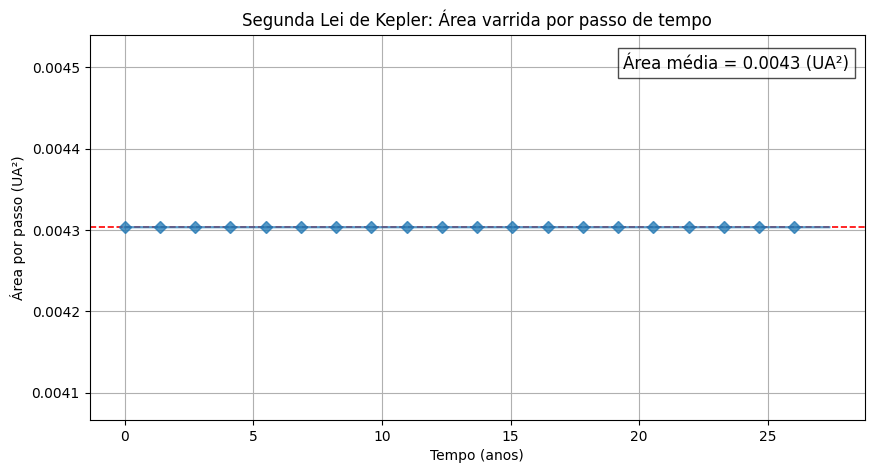

Área média = 0.004304
Desvio padrão = 0.000000
Coeficiente de variação = 0.000000


In [3]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------------------------
# Lê o arquivo gerado pelo Fortran
# --------------------------------------------------------------------
dados = np.loadtxt("saida-1-12694394.txt", delimiter=",")

t = dados[:,0]       # tempo
area = dados[:,1]    # área varrida em cada passo

# --------------------------------------------------------------------
# Calcula estatísticas
# --------------------------------------------------------------------
area_media = np.mean(area)
desvio = np.std(area)

# --------------------------------------------------------------------
# Plota a área por passo da órbita
# --------------------------------------------------------------------
plt.figure(figsize=(10,5))

# Linha horizontal em vermelho indicando a área média
plt.axhline(area_media, color='red', linestyle='--', linewidth=1.2)


plt.plot(t, area, linewidth=1.6, marker="D", markevery=500,alpha=0.75)

plt.title("Segunda Lei de Kepler: Área varrida por passo de tempo")
plt.xlabel("Tempo (anos)")
plt.ylabel("Área por passo (UA²)")
plt.grid(True)

# --------------------------------------------------------------------
# Escreve a área média no canto superior direito
# --------------------------------------------------------------------
texto = f"Área média = {area_media:.4f} (UA²)"
plt.text(
    0.98, 0.95, texto,
    transform=plt.gca().transAxes,
    fontsize=12,
    ha='right', va='top',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')
)
plt.savefig('fig1.png')
plt.show()

# --------------------------------------------------------------------
# Também imprime no terminal
# --------------------------------------------------------------------
print(f"Área média = {area_media:.6f}")
print(f"Desvio padrão = {desvio:.6f}")
print(f"Coeficiente de variação = {desvio/area_media:.6f}")


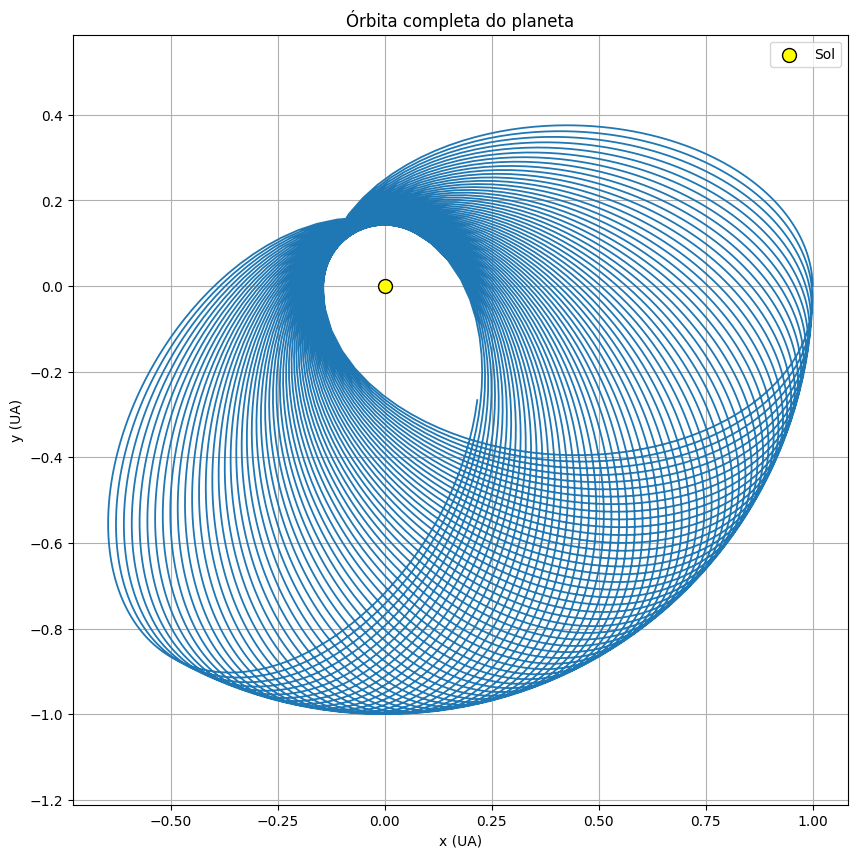

In [4]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------------------------
# Lê o arquivo com as coordenadas da órbita
# --------------------------------------------------------------------
dados = np.loadtxt("saida-2-12694394.txt", delimiter=",")

t = dados[:,0]     # tempo (se existir, mas não usamos no gráfico)
x = dados[:,1]     # posição x
y = dados[:,2]     # posição y

# --------------------------------------------------------------------
# Plota a órbita
# --------------------------------------------------------------------
plt.figure(figsize=(10,10))
plt.plot(x, y, linewidth=1.3)

# Marca a posição inicial
# plt.scatter(x[0], y[0], color='red', label='Posição inicial')

# Marca o Sol (assumindo no centro)
plt.scatter(0, 0, color='yellow', edgecolor='black', s=100, zorder=3, label='Sol')

plt.title("Órbita completa do planeta")
plt.xlabel("x (UA)")
plt.ylabel("y (UA)")
plt.grid(True)
plt.axis('equal')  # Mantém as proporções corretas da elipse
plt.legend()
plt.savefig('fig2.png')
plt.show()
